In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [45]:
! kaggle competitions download -c birdclef-2022 -p /content/

100% 6.12G/6.12G [00:56<00:00, 181MB/s]
100% 6.12G/6.12G [00:56<00:00, 116MB/s]


In [ ]:
! mkdir /content/birdclef-2022
! unzip /content/birdclef-2022.zip -d /content/birdclef-2022

In [53]:
import numpy as np
import librosa as lb
import librosa.display as lbd
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd

import mimetypes
mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')
import IPython.display as ipd

In [50]:
DATA_ROOT = Path("/content/birdclef-2022")
TRAIN_AUDIO_ROOT = Path("/content/birdclef-2022/train_audio")
NO_CALL_ROOT = Path("/content/drive/MyDrive/no_call_detect")
TRAIN_AUDIO_IMAGES_SAVE_ROOT = Path("/content/drive/MyDrive/audio_images") # Where to save the mels images


In [81]:
df = pd.read_csv(NO_CALL_ROOT/"nocalldetection_for_shortaudio_fold0.csv")

primary_label = "afrsil1"
file_name = 'XC175522.ogg'
file_path = primary_label + '/' + file_name


no_call_prob = df.loc[df['filename'].str.match(file_path)]
temp_str = no_call_prob.iloc[0]['nocalldetection']

call_prob = [float(x) for x in temp_str.split()]
print(call_prob)

[0.9458388686180115, 0.9789926409721375, 0.8463640809059143, 0.6973912715911865, 0.7146226763725281, 0.8526286482810974, 0.5635262131690979, 0.9472705125808716, 0.978165328502655]


In [21]:
print(str( (TRAIN_AUDIO_IMAGES_SAVE_ROOT/primary_label/file_name).as_posix() + ".npy"))
mels = np.load( str( (TRAIN_AUDIO_IMAGES_SAVE_ROOT/primary_label/primary_label/file_name).as_posix() + ".npy") )

print(mels.shape)

/content/drive/MyDrive/audio_images/afrsil1/XC175522.ogg.npy
(9, 128, 281)


Listen to Audio 

In [55]:
ipd.Audio(str(TRAIN_AUDIO_ROOT/primary_label/file_name))

View the Mel

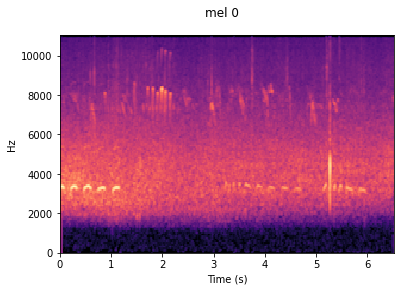

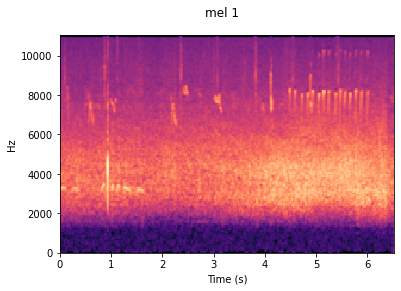

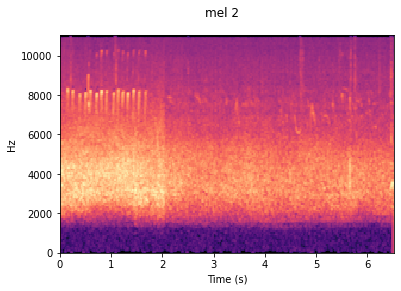

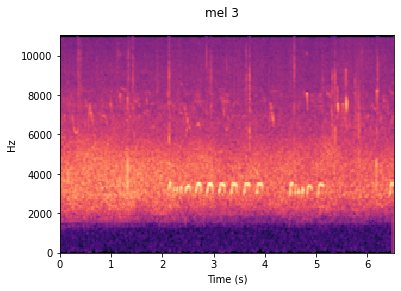

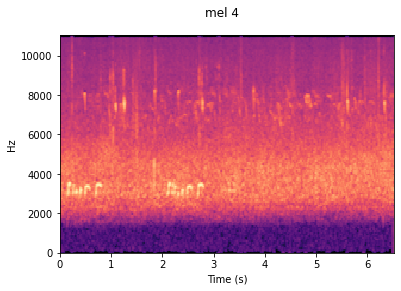

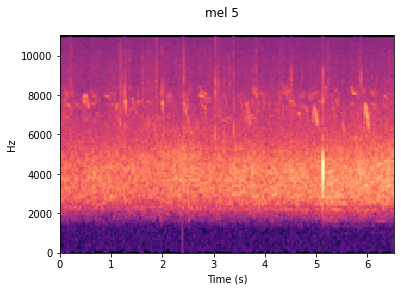

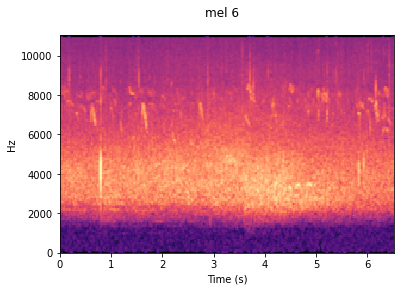

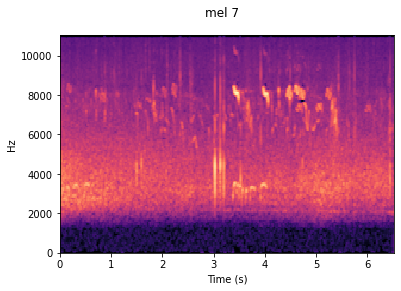

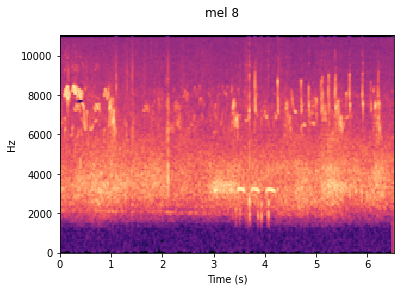

In [54]:
ipd.Audio(str(TRAIN_AUDIO_ROOT/primary_label/file_name))

for i in range(len(mels)):
  fig = plt.figure()
  fig.suptitle(f"mel {i}")
  lbd.specshow(mels[i], x_axis='s', y_axis='hz')
